In [4]:
import numpy as np
import pandas as pd
from pandas import concat
import matplotlib.pyplot as plt

In [ ]:
population=pd.read_csv('/content/state-population.csv')
area=pd.read_csv("/content/state-areas.csv")
abbrevs=pd.read_csv("/content/state-abbrevs.csv")


In [ ]:
population.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [ ]:
area.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [ ]:
abbrevs.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [ ]:
merge1=pd.DataFrame(population)
merge3=pd.DataFrame(abbrevs)
merged_half=pd.merge(merge1,merge3,how='outer',left_on='state/region', right_on='abbreviation')
merged_half.head()

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL


In [ ]:
merged_full = pd.merge(merged_half, area, on='state', how='left')
merged_full.head()

,state/region,ages,year,population,state,abbreviation,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,AL,52423.0
1,AL,total,2012,4817528.0,Alabama,AL,52423.0
2,AL,under18,2010,1130966.0,Alabama,AL,52423.0
3,AL,total,2010,4785570.0,Alabama,AL,52423.0
4,AL,under18,2011,1125763.0,Alabama,AL,52423.0


**1) Indexing**

In [ ]:
merged_full.set_index('year', drop=True, append=False, inplace=False, verify_integrity=False)

,state/region,ages,population,state,abbreviation,area (sq. mi)
year,,,,,,
2012,AL,under18,1117489.0,Alabama,AL,52423.0
2012,AL,total,4817528.0,Alabama,AL,52423.0
2010,AL,under18,1130966.0,Alabama,AL,52423.0
2010,AL,total,4785570.0,Alabama,AL,52423.0
2011,AL,under18,1125763.0,Alabama,AL,52423.0
...,...,...,...,...,...,...
2010,USA,total,309326295.0,NaN,NaN,NaN
2011,USA,under18,73902222.0,NaN,NaN,NaN
2011,USA,total,311582564.0,NaN,NaN,NaN


Deleting Duplicates

In [ ]:
merged_full = merged_full.loc[:,~merged_full.apply(lambda x: x.duplicated(),axis=1).all()].copy()
merged_full

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0
...,...,...,...,...,...,...
2539,USA,total,2010,309326295.0,NaN,NaN
2540,USA,under18,2011,73902222.0,NaN,NaN
2541,USA,total,2011,311582564.0,NaN,NaN
2542,USA,under18,2012,73708179.0,NaN,NaN


Handling NULL values

In [ ]:
merged_full.isnull().any()

state/region     False
ages             False
year             False
population        True
state             True
area (sq. mi)     True
dtype: bool

In [ ]:
merged_full.dropna(inplace=True)
merged_full.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [ ]:
merged_full.isnull().any()

state/region     False
ages             False
year             False
population       False
state            False
area (sq. mi)    False
dtype: bool

Aggregation

In [ ]:
merged_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2448 entries, 0 to 2447
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state/region   2448 non-null   object 
 1   ages           2448 non-null   object 
 2   year           2448 non-null   int64  
 3   population     2448 non-null   float64
 4   state          2448 non-null   object 
 5   area (sq. mi)  2448 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 133.9+ KB


In [ ]:
merged_full.describe()

,year,population,area (sq. mi)
count,2448.000000,2.448000e+03,2448.000000
mean,2001.500000,3.494881e+06,74252.627451
std,6.923601,5.011334e+06,94929.655186
min,1990.000000,1.013090e+05,68.000000
25%,1995.750000,7.282355e+05,35387.000000
50%,2001.500000,1.557804e+06,56276.000000
75%,2007.250000,4.406263e+06,84904.000000
max,2013.000000,3.833252e+07,656425.000000


In [ ]:
merged_full.std

<bound method NDFrame._add_numeric_operations.<locals>.std of      state/region     ages  year  population    state  area (sq. mi)
0              AL  under18  2012   1117489.0  Alabama        52423.0
1              AL    total  2012   4817528.0  Alabama        52423.0
2              AL  under18  2010   1130966.0  Alabama        52423.0
3              AL    total  2010   4785570.0  Alabama        52423.0
4              AL  under18  2011   1125763.0  Alabama        52423.0
...           ...      ...   ...         ...      ...            ...
2443           WY  under18  1993    137458.0  Wyoming        97818.0
2444           WY    total  1991    459260.0  Wyoming        97818.0
2445           WY  under18  1991    136720.0  Wyoming        97818.0
2446           WY  under18  1990    136078.0  Wyoming        97818.0
2447           WY    total  1990    453690.0  Wyoming        97818.0

[2448 rows x 6 columns]>

In [ ]:
merged_full.var()

<ipython-input-16-0e8694737f6e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged_full.var()


year             4.793625e+01
population       2.511347e+13
area (sq. mi)    9.011639e+09
dtype: float64

Grouping

In [ ]:
age = merged_full.groupby("ages").sum()
age

,year,population,area (sq. mi)
ages,,,
total,2449836,6.839951e+09,90885216.0
under18,2449836,1.715519e+09,90885216.0


In [ ]:
state = merged_full.groupby("state").mean()
state

,year,population,area (sq. mi)
state,,,
Alabama,2001.5,2.797862e+06,52423.0
Alaska,2001.5,4.164389e+05,656425.0
Arizona,2001.5,3.337577e+06,114006.0
Arkansas,2001.5,1.686640e+06,53182.0
California,2001.5,2.170908e+07,163707.0
Colorado,2001.5,2.727803e+06,104100.0
Connecticut,2001.5,2.128442e+06,5544.0
Delaware,2001.5,4.979201e+05,1954.0
District of Columbia,2001.5,3.496533e+05,68.0


Apply

In [ ]:
total=merged_full['population'].sum()
proportion=[]
def Percentage(merged_full):
  proportion.append(merged_full['population']/total)
  return proportion


Pivot

In [ ]:
pi = merged_full.pivot_table(index='ages',columns='year')
pi

area (sq. mi)                                                          \
year             1990          1991          1992          1993          1994   
ages                                                                            
total    74252.627451  74252.627451  74252.627451  74252.627451  74252.627451   
under18  74252.627451  74252.627451  74252.627451  74252.627451  74252.627451   

                                                                               \
year             1995          1996          1997          1998          1999   
ages                                                                            
total    74252.627451  74252.627451  74252.627451  74252.627451  74252.627451   
under18  74252.627451  74252.627451  74252.627451  74252.627451  74252.627451   

         ...    population                                            \
year     ...          2004          2005          2006          2007   
ages     ...                                                           
total    ...  5.741280e+06  5.794443e+06  5.850587e+06  5.906494e+06   
under18  ...  1.437210e+06  1.441641e+06  1.446230e+06  1.451361e+06   

                                                                               \
year             2008          2009          2010          2011          2012   
ages                                                                            
total    5.962627e+06  6.015128e+06  6.065221e+06  6.109462e+06  6.154386e+06   
under18  1.453031e+06  1.453611e+06  1.453325e+06  1.449063e+06  1.445258e+06   

                       
year             2013  
ages                   
total    6.198605e+06  
under18  1.442860e+06  

[2 rows x 48 columns]

**Q2)**

INDEXING BY TIME

In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/reddyprasade/Fremont-Bridge-Bicycle-Counter-Data-Analysis/master/Data/Fremont_Bridge_Bicycle_Counter.csv",header=0, index_col=0, parse_dates=True,
squeeze=True)
df

,Fremont Bridge Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2019-10-31 19:00:00,111.0,44.0,67.0
2019-10-31 20:00:00,52.0,17.0,35.0
2019-10-31 21:00:00,41.0,16.0,25.0


shifting

In [ ]:
df.shift(1)

,Fremont Bridge Total,East,West
Date,,,
2012-10-03 00:00:00,NaN,NaN,NaN
2012-10-03 01:00:00,13.0,4.0,9.0
2012-10-03 02:00:00,10.0,4.0,6.0
2012-10-03 03:00:00,2.0,1.0,1.0
2012-10-03 04:00:00,5.0,2.0,3.0
...,...,...,...
2019-10-31 19:00:00,305.0,77.0,228.0
2019-10-31 20:00:00,111.0,44.0,67.0
2019-10-31 21:00:00,52.0,17.0,35.0


In [ ]:
df.tshift(2)

<ipython-input-23-5deb47a627ac>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  df.tshift(2)


,Fremont Bridge Total,East,West
Date,,,
2012-10-03 02:00:00,13.0,4.0,9.0
2012-10-03 03:00:00,10.0,4.0,6.0
2012-10-03 04:00:00,2.0,1.0,1.0
2012-10-03 05:00:00,5.0,2.0,3.0
2012-10-03 06:00:00,7.0,6.0,1.0
...,...,...,...
2019-10-31 21:00:00,111.0,44.0,67.0
2019-10-31 22:00:00,52.0,17.0,35.0
2019-10-31 23:00:00,41.0,16.0,25.0


In [ ]:
df_y = df.resample('Y').mean()
df_y

,Fremont Bridge Total,East,West
Date,,,
2012-12-31,70.699537,36.312037,34.387500
2013-12-31,105.992121,54.691825,51.300297
2014-12-31,114.875671,58.833885,56.041786
2015-12-31,112.659130,57.201667,55.457463
2016-12-31,111.860412,53.319367,58.541045
2017-12-31,109.959470,47.094988,62.864482
2018-12-31,120.091335,48.596301,71.495034
2019-12-31,142.673886,54.659630,88.014256


Rolling indow

In [ ]:
RM = df.rolling(12, center=True)
RM

Rolling [window=12,center=True,axis=0,method=single]

Visualization

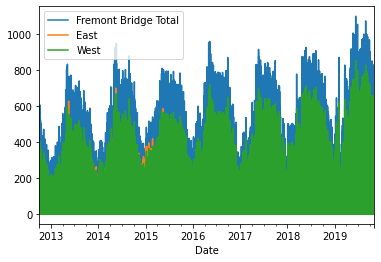

In [ ]:
df.plot()

**Q3)**

INDEXING


In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/wangruinju/python-for-data-analysis/master/pydata-book-2nd-edition/examples/stock_px_2.csv')
df

,Unnamed: 0,AAPL,MSFT,XOM,SPX
0,2003-01-02 00:00:00,7.40,21.11,29.22,909.03
1,2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2,2003-01-06 00:00:00,7.45,21.52,29.96,929.01
3,2003-01-07 00:00:00,7.43,21.93,28.95,922.93
4,2003-01-08 00:00:00,7.28,21.31,28.83,909.93
...,...,...,...,...,...
2209,2011-10-10 00:00:00,388.81,26.94,76.28,1194.89
2210,2011-10-11 00:00:00,400.29,27.00,76.27,1195.54
2211,2011-10-12 00:00:00,402.19,26.96,77.16,1207.25
2212,2011-10-13 00:00:00,408.43,27.18,76.37,1203.66


Selection

In [19]:
df["MSFT"]

0       21.11
1       21.14
2       21.52
3       21.93
4       21.31
        ...  
2209    26.94
2210    27.00
2211    26.96
2212    27.18
2213    27.27
Name: MSFT, Length: 2214, dtype: float64

In [20]:
df[df["MSFT"] > 25]

,Unnamed: 0,AAPL,MSFT,XOM,SPX
726,2005-11-17 00:00:00,64.52,25.09,50.77,1242.80
727,2005-11-18 00:00:00,64.56,25.18,51.54,1248.27
728,2005-11-21 00:00:00,64.96,25.26,52.53,1254.85
729,2005-11-22 00:00:00,66.52,25.04,52.79,1261.23
730,2005-11-23 00:00:00,67.11,25.05,52.98,1265.61
...,...,...,...,...,...
2209,2011-10-10 00:00:00,388.81,26.94,76.28,1194.89
2210,2011-10-11 00:00:00,400.29,27.00,76.27,1195.54
2211,2011-10-12 00:00:00,402.19,26.96,77.16,1207.25
2212,2011-10-13 00:00:00,408.43,27.18,76.37,1203.66


Subsetting


In [21]:
df.loc[:,['MSFT']]

,MSFT
0,21.11
1,21.14
2,21.52
3,21.93
4,21.31
...,...
2209,26.94
2210,27.00
2211,26.96
2212,27.18


Date Ranges

In [23]:
df.max()

Unnamed: 0    2011-10-14 00:00:00
AAPL                        422.0
MSFT                        34.07
XOM                         87.48
SPX                       1565.15
dtype: object

In [11]:
df.min()

AAPL      6.56
MSFT     14.33
XOM      26.21
SPX     676.53
dtype: float64

Frequences

In [12]:
df.value_counts()

AAPL    MSFT   XOM    SPX    
6.56    20.10  29.05  893.58     1
156.66  23.64  73.75  1260.31    1
154.50  27.11  84.92  1531.38    1
154.55  26.95  82.47  1360.55    1
155.64  29.48  75.61  1310.50    1
                                ..
57.59   22.99  49.42  1207.01    1
57.56   19.97  52.57  1251.54    1
57.50   23.22  49.65  1202.76    1
57.47   20.38  51.31  1240.12    1
422.00  27.27  78.11  1224.58    1
Length: 2214, dtype: int64

Shifts

In [13]:
df.shift(3)

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,NaN,NaN,NaN,NaN
2003-01-06,NaN,NaN,NaN,NaN
2003-01-07,7.40,21.11,29.22,909.03
2003-01-08,7.45,21.14,29.24,908.59
...,...,...,...,...
2011-10-10,378.25,25.89,73.95,1144.03
2011-10-11,377.37,26.34,73.89,1164.97
2011-10-12,369.80,26.25,73.56,1155.46
2011-10-13,388.81,26.94,76.28,1194.89


In [14]:
df.shift(-3)

,AAPL,MSFT,XOM,SPX
2003-01-02,7.43,21.93,28.95,922.93
2003-01-03,7.28,21.31,28.83,909.93
2003-01-06,7.34,21.93,29.44,927.57
2003-01-07,7.36,21.97,29.03,927.57
2003-01-08,7.32,22.16,28.91,926.26
...,...,...,...,...
2011-10-10,408.43,27.18,76.37,1203.66
2011-10-11,422.00,27.27,78.11,1224.58
2011-10-12,NaN,NaN,NaN,NaN
2011-10-13,NaN,NaN,NaN,NaN


Time Zone Localiztion and Conversion

In [24]:
Dates = df["Unnamed: 0"]
df["Unnamed: 0"] = pd.to_datetime(Dates)
df = df.set_index('Unnamed: 0')

In [25]:
dates = df.tz_localize('US/Eastern')
dates

,AAPL,MSFT,XOM,SPX
Unnamed: 0,,,,
2003-01-02 00:00:00-05:00,7.40,21.11,29.22,909.03
2003-01-03 00:00:00-05:00,7.45,21.14,29.24,908.59
2003-01-06 00:00:00-05:00,7.45,21.52,29.96,929.01
2003-01-07 00:00:00-05:00,7.43,21.93,28.95,922.93
2003-01-08 00:00:00-05:00,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10 00:00:00-04:00,388.81,26.94,76.28,1194.89
2011-10-11 00:00:00-04:00,400.29,27.00,76.27,1195.54
2011-10-12 00:00:00-04:00,402.19,26.96,77.16,1207.25


Periods and Period Arthemetic

In [ ]:
dates.index = pd.PeriodIndex(df.index, freq='M')
dates

,AAPL,MSFT,XOM,SPX
2003-01,7.40,21.11,29.22,909.03
2003-01,7.45,21.14,29.24,908.59
2003-01,7.45,21.52,29.96,929.01
2003-01,7.43,21.93,28.95,922.93
2003-01,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10,388.81,26.94,76.28,1194.89
2011-10,400.29,27.00,76.27,1195.54
2011-10,402.19,26.96,77.16,1207.25
2011-10,408.43,27.18,76.37,1203.66


In [ ]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

Period Frequency Conversion

In [ ]:
index = pd.PeriodIndex(dates.index, freq='Q')
index = index.asfreq('Y')

In [ ]:
index

PeriodIndex(['2003', '2003', '2003', '2003', '2003', '2003', '2003', '2003',
             '2003', '2003',
             ...
             '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011',
             '2011', '2011'],
            dtype='period[A-DEC]', length=2214)

Resampling and Frequency Conversion

In [ ]:
df_down = df['AAPL'].resample('M').mean()
df_down

2003-01-31      7.239048
2003-02-28      7.333684
2003-03-31      7.299048
2003-04-30      6.923810
2003-05-31      8.885238
                 ...    
2011-06-30    331.081364
2011-07-31    372.238000
2011-08-31    376.762609
2011-09-30    392.493333
2011-10-31    389.424000
Freq: M, Name: AAPL, Length: 106, dtype: float64

In [ ]:
df_up = df['AAPL'].resample('D').interpolate()
df_up

2003-01-02      7.40
2003-01-03      7.45
2003-01-04      7.45
2003-01-05      7.45
2003-01-06      7.45
               ...  
2011-10-10    388.81
2011-10-11    400.29
2011-10-12    402.19
2011-10-13    408.43
2011-10-14    422.00
Freq: D, Name: AAPL, Length: 3208, dtype: float64

Moving Window

In [ ]:
RM = df['XOM'].rolling(7).mean()
RM

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    73.470000
2011-10-11    73.990000
2011-10-12    74.848571
2011-10-13    75.354286
2011-10-14    75.948571
Name: XOM, Length: 2214, dtype: float64

Exponentially Weighted Average

In [ ]:
ewm = df['XOM'].ewm(span=7).mean()
ewm

2003-01-02    29.220000
2003-01-03    29.231429
2003-01-06    29.546486
2003-01-07    29.328343
2003-01-08    29.164994
                ...    
2011-10-10    73.930507
2011-10-11    74.515381
2011-10-12    75.176535
2011-10-13    75.474902
2011-10-14    76.133676
Name: XOM, Length: 2214, dtype: float64

**C) Classifier**

Q4)

In [70]:
df2 = pd.read_csv("/content/kidney_disease.csv")
df2

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
df2.shape

(400, 26)

In [71]:
df2.corr()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
id,1.000000,-0.185308,-0.245744,0.642156,-0.541993,-0.283416,-0.338673,-0.307175,-0.268683,0.364251,-0.092347,0.640298
age,-0.185308,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928
bp,-0.245744,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540
sg,0.642156,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582
al,-0.541993,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632
su,-0.283416,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775
bgr,-0.338673,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189
bu,-0.307175,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360
sc,-0.268683,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670
sod,0.364251,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183


In [73]:
df2 = df2[['hemo','bgr','classification']]
df2

,hemo,bgr,classification
0,15.4,121.0,ckd
1,11.3,NaN,ckd
2,9.6,423.0,ckd
3,11.2,117.0,ckd
4,11.6,106.0,ckd
...,...,...,...
395,15.7,140.0,notckd
396,16.5,75.0,notckd
397,15.8,100.0,notckd
398,14.2,114.0,notckd


In [74]:
df.corr()

,AAPL,MSFT,XOM,SPX
AAPL,1.000000,0.534480,0.717997,0.244478
MSFT,0.534480,1.000000,0.605980,0.746871
XOM,0.717997,0.605980,1.000000,0.528731
SPX,0.244478,0.746871,0.528731,1.000000


Data Cleaning

In [75]:
df2.isnull().any()

hemo               True
bgr                True
classification    False
dtype: bool

In [76]:
df2.dropna(inplace=True)
df2

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,hemo,bgr,classification
0,15.4,121.0,ckd
2,9.6,423.0,ckd
3,11.2,117.0,ckd
4,11.6,106.0,ckd
5,12.2,74.0,ckd
...,...,...,...
395,15.7,140.0,notckd
396,16.5,75.0,notckd
397,15.8,100.0,notckd
398,14.2,114.0,notckd


In [77]:
df2.isnull().any()

hemo              False
bgr               False
classification    False
dtype: bool

In [78]:
df2

,hemo,bgr,classification
0,15.4,121.0,ckd
2,9.6,423.0,ckd
3,11.2,117.0,ckd
4,11.6,106.0,ckd
5,12.2,74.0,ckd
...,...,...,...
395,15.7,140.0,notckd
396,16.5,75.0,notckd
397,15.8,100.0,notckd
398,14.2,114.0,notckd


In [65]:
df2.describe(include=['object'])

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane
count,248,335,396,396,330,295,270,398,398,398,399,399,399
unique,2,2,2,2,44,92,49,2,5,3,2,2,2
top,normal,normal,notpresent,notpresent,41,9800,5.2,no,no,no,good,no,no
freq,201,259,354,374,21,11,18,251,258,362,317,323,339


In [80]:
classification = np.array(df2['classification'])

In [81]:
for i in range(len(classification)):
    if classification[i]=='ckd\t':
        classification[i]='ckd'

In [82]:
df2['classification']=classification

<ipython-input-82-6ea98eba46cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['classification']=classification


In [83]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [84]:
label = LabelEncoder()
minmax = MinMaxScaler()

In [86]:
df2['classification']=label.fit_transform(df2['classification'])

<ipython-input-86-12ab7b194829>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['classification']=label.fit_transform(df2['classification'])


In [87]:
from sklearn.model_selection import train_test_split

In [89]:
X = df2
y = df2.pop('classification')

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
X_train

,hemo,bgr
217,12.2,78.0
249,3.1,176.0
91,16.1,210.0
285,16.0,94.0
76,10.3,133.0
...,...,...
155,11.1,123.0
210,7.3,255.0
292,16.7,89.0
258,13.9,98.0


In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
dtc = DecisionTreeClassifier(random_state=42,max_leaf_nodes=7,min_samples_leaf=13)
knn = KNeighborsClassifier(n_neighbors=7)
svc = SVC()

In [92]:
knn.fit(X=X_train,y=y_train)

KNeighborsClassifier(n_neighbors=7)

In [93]:
dtc.fit(X=X_train,y=y_train)

DecisionTreeClassifier(max_leaf_nodes=7, min_samples_leaf=13, random_state=42)

In [94]:
svc.fit(X=X_train,y=y_train)

SVC()

In [95]:
knn_ypred = knn.predict(X_test)
dtc_ypred = dtc.predict(X_test)
svc_ypred = svc.predict(X_test)

In [96]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [97]:
knn_acc = accuracy_score(y_test,knn_ypred)
print(f'Accuracy score : {knn_acc}')

Accuracy score : 0.8888888888888888


In [98]:
dtc_acc = accuracy_score(y_test,dtc_ypred)
print(f'Accuracy score : {dtc_acc}')

Accuracy score : 0.9523809523809523


In [99]:
svc_acc = accuracy_score(y_test,svc_ypred)
print(f'Accuracy score : {svc_acc}')

Accuracy score : 0.8095238095238095


Alice has Haemoglobin 0 and Glucose levels 1.1 standard deviations above average, find if Alice is likely to have CKD

In [103]:
hem = np.array(df2['hemo'])
glu = np.array(df2['bgr'])

In [104]:
sd1 = np.std(hem)
sd2 = np.std(glu)
me1 = np.mean(hem)
me2 = np.mean(glu)

In [106]:
ali_h = (0*sd1)+me1
ali_g = (1.1*sd2)+me2
alice = pd.DataFrame({
    'hemo':[ali_h],
    'bgr':[ali_g]
})
alice

,hemo,bgr
0,12.647115,233.833352


In [110]:
alice_knn = knn.predict(alice)
alice_dtc = dtc.predict(alice)
alice_svc = svc.predict(alice)
alice_knn
alice_dtc
alice_svc

array([0])

As the predictions are 0, we can conclude that Alice does not have disease

**5Q)**

In [111]:
df3 = pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df3

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
df3.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
df3.isnull().any()

Wine                    False
Alcohol                 False
Malic.acid              False
Ash                     False
Acl                     False
Mg                      False
Phenols                 False
Flavanoids              False
Nonflavanoid.phenols    False
Proanth                 False
Color.int               False
Hue                     False
OD                      False
Proline                 False
dtype: bool

In [ ]:
X = df3.drop('Wine',axis=1)
y = df3['Wine']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
X_train

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
128,12.37,1.63,2.30,24.5,88,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342
159,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620
78,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660
75,11.66,1.88,1.92,16.0,97,1.61,1.57,0.34,1.15,3.80,1.23,2.14,428
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695
155,13.17,5.19,2.32,22.0,93,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725
169,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630
28,13.87,1.90,2.80,19.4,107,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
y_predict

array([2, 2, 1, 2, 2, 3, 2, 2, 2, 3, 1, 1, 1, 1, 2, 2, 2, 1, 2, 3, 1, 2,
       1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 3, 1])

In [ ]:
from sklearn import metrics
CM = metrics.confusion_matrix(y_test,y_predict)
CM

array([[13,  0,  0],
       [ 3, 10,  2],
       [ 1,  3,  4]])

**SVC**

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
y_pre = svm.predict(X_test)
y_pre

array([2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 3, 3, 2, 2, 1, 2,
       3, 2, 1, 1, 2, 1, 1, 3, 1, 1, 1, 2, 2, 1])

In [ ]:
C = metrics.confusion_matrix(y_test,y_pre)
C

array([[12,  0,  1],
       [ 2, 11,  2],
       [ 0,  6,  2]])

**Decision Tree**

In [ ]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
y_pred

array([2, 3, 1, 2, 2, 2, 3, 3, 2, 3, 1, 2, 1, 1, 2, 2, 2, 3, 2, 3, 1, 2,
       1, 3, 1, 1, 3, 1, 1, 3, 3, 1, 1, 2, 2, 1])

In [ ]:
M = metrics.confusion_matrix(y_test,y_pred)
M

array([[12,  1,  0],
       [ 1, 11,  3],
       [ 0,  1,  7]])

In [ ]:
#svc

In [113]:
svc.fit(X_train,y_train)
svc_predict = svc.predict(X_test)

In [114]:
accuracy_score(y_test,svc_predict)

0.8095238095238095

Confusion Matrix

In [116]:
confusion_matrix(y_test,svc_predict)

array([[21, 12],
       [ 0, 30]])

7Q)

##### Predict Home prices employing multiple regression. Compare performance with a KNN  Regressor model used for prediction. Draw a residual plot for these predictions and offer your comments. 

In [323]:
df4= pd.read_csv('/content/House.csv')

In [324]:
df4.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [325]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [326]:
df4.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [327]:
columns = df4.describe(include='object').columns

In [328]:
df4.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [329]:
columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [330]:
for i in columns:
    df4[i]=lab.fit_transform(df4[[i]])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [331]:
all_cols = df4.columns
all_cols

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [332]:
for i in all_cols[1:]:
    df4[i]=mms.fit_transform(df4[[i]])

In [333]:
y= df4.pop('price')
X = df4

In [334]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [335]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
regressor = LinearRegression()
knr = KNeighborsRegressor(n_neighbors=7)

In [336]:
regressor.fit(X_train,y_train)
df4_pred = regressor.predict(X_test)

In [337]:
knr.fit(X_train,y_train)
k_pred = knr.predict(X_test)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


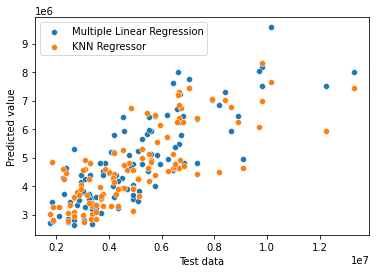

In [338]:
sns.scatterplot(y_test,df4_pred)
sns.scatterplot(y_test,k_pred)
plt.legend(['Multiple Linear Regression','KNN Regressor'])
plt.xlabel('Test data')
plt.ylabel('Predicted value')
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


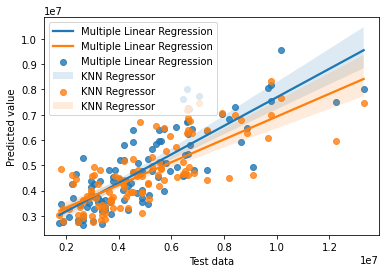

In [339]:

sns.regplot(y_test,df4_pred)
sns.regplot(y_test,k_pred)
plt.legend(['Multiple Linear Regression','Multiple Linear Regression','Multiple Linear Regression','KNN Regressor','KNN Regressor','KNN Regressor'])
plt.xlabel('Test data')
plt.ylabel('Predicted value')
plt.show()

In [340]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [344]:
rmae = mean_absolute_error(y_test,df4_pred)
rmse = mean_squared_error(y_test,df4_pred)
r2 = r2_score(y_test,df4_pred)

In [342]:
kmae = mean_absolute_error(y_test,k_pred)
kmse = mean_squared_error(y_test,k_pred)
kr2 = r2_score(y_test,k_pred)

In [345]:
metrics = {'MAE':[rmae,kmae],'MSE':[rmse,kmse],'R2 score':[rr2,kr2]}
metrics_df = pd.DataFrame(metrics)
metrics_df.index=['MLR','KNN']
metrics_df

,MAE,MSE,R2 score
MLR,9.796797e+05,1.771751e+12,0.649475
KNN,1.089523e+06,2.402156e+12,0.524756


Here, R2 score and MSE are better for Multiple Regression and MAE is better for KNN

**8Q)**

In [208]:
from sklearn.datasets import fetch_openml
titanic = fetch_openml('titanic', version=1, as_frame=True)
titanic_df = titanic['data']
titanic_df['survived'] = titanic['target']

In [209]:
titanic_df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,None,C,None,328.0,None,0
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,None,C,None,NaN,None,0
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,None,C,None,304.0,None,0
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,None,C,None,NaN,None,0


In [210]:
#name is definetly not needed so remove it
titanic_df.drop(['cabin', 'boat', 'body'], axis=1, inplace=True)
 
# remove less interesting features
titanic_df.drop(['name','ticket','home.dest'], axis=1, inplace=True)

In [211]:
titanic_df['sex']=lab.fit_transform(titanic_df[['sex']])
titanic_df['embarked']=lab.fit_transform(titanic_df[['embarked']])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [213]:
for i in titanic_df.columns[:-1]:
    titanic_df[i]=mms.fit_transform(titanic_df[[i]])

In [214]:
titanic_df.isnull().sum()

pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      0
survived      0
dtype: int64

In [215]:
age = titanic_df['age']
ages = [i for i in age if (i>=0 and i<=1)]

In [216]:
avg_age = np.array(ages).mean()
for i in range(len(age)):
    if (age[i]>=0 and age[i]<=1):
        pass
    else:
        age[i]=avg_age

<ipython-input-216-6d57e88afded>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age[i]=avg_age


In [217]:
titanic_df.dropna(inplace=True)

In [218]:
y = titanic_df.pop("survived")
X = titanic_df
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [219]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)

In [223]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

In [224]:
logr.fit(X_train,y_train)

LogisticRegression()

In [234]:
y__pred = logr.predict(X_test)

In [232]:
acc=accuracy_score(y_test,y_pred)
acc

0.7595419847328244

In [233]:
conf = confusion_matrix(y_test,y_pred)
conf

array([[129,  32],
       [ 31,  70]])